# Tutorial on using Image Feature Extraction using pytorch.

### Introduction

Convolutional Neural Networks have proven to be the state of the art in object recognition
and feature extraction. These neural networks require large amounts of training data to understand relevant features in images. Due to this, it can be very useful to use pre-trained networks that have already been trained on a large number of images to extract relevant features on images. 

#### Pytorch 
Pytorch is a python API that has a large collection of deep neural networks that
can be used for image analysis. In this tutorial we will focus on using Pytorch for feature extraction on different images and furthur use these features to create some sort of feature matching function to visualize the similarity between two images to find similar images.



First we will download and import all relevant libraries required to run our feature extraction
The Libraries required are - 
- Pillow -> used to load and read images in python
- Pytorch -> used to load pre-trained CNN's
- Numpy -> used for different computations.


Run the following cell to download the Pillow and Pytorch Library if not already installed.

In [63]:
import sys
!conda install --yes --prefix {sys.prefix} pytorch
!pip install Pillow==4.0.0
!pip install PIL
!pip install image

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.4.7
  latest version: 4.5.0

Please update conda by running

    $ conda update -n base conda



# All requested packages already installed.

You are using pip version 9.0.1, however version 9.0.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
  Could not find a version that satisfies the requirement PIL (from versions: )
No matching distribution found for PIL
You are using pip version 9.0.1, however version 9.0.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
You are using pip version 9.0.1, however version 9.0.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


Run the following cell to import all relevant libraries.

In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os, os.path
from PIL import Image
import torch
import torch.nn as nn
from torchvision import models
import torchvision.transforms as transforms
from torch.autograd import Variable

Now that we have all the various required libraries set up we must first read in our images into our work enviornment. We can store the different image vectors in a Pandas DataFrame for easy access to image data.

For this Tutorial we will assume that all images are in the .jpg or .png format.

Once we have the path to each individual image, we can read them in using the PILLOW libary and append the image variable to our image dictionary.

For visualization purposes I have included some images in the data folder which should be included in the zip file. I will use these images to show the functionality of the feature matching.

In [65]:
def load_images(base_dir):
    valid_extensions = [".jpeg",".jpg",".png"]
    image_dict = {}
    for image in os.listdir(base_dir):
        fileparts = os.path.splitext(image)
        filename = fileparts[0]
        ext = fileparts[1]
        if ext.lower() in valid_extensions:
            print(image)
            curr_image = Image.open(os.path.join(base_dir,image))
            print(curr_image)
            image_dict[image] = curr_image
        
    return image_dict

In [66]:
image_dir = 'data/'
image_dict = load_images(image_dir)
print(image_dict)

elephant.jpeg
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=183x275 at 0x12E759E10>
elephant_2.jpg
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1000x600 at 0x12E759B00>
giraffe.jpeg
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=300x168 at 0x12D2DC940>
giraffe_2.JPG
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=2048x2048 at 0x12D2DC550>
kitten.jpg
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=474x355 at 0x12E77D668>
kitten_2.jpeg
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=194x259 at 0x12E759FD0>
retreiver.jpg
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x600 at 0x12E7595F8>
retreiver_2.jpg
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x500 at 0x11AC5CF28>
rotweiler.jpg
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=225x225 at 0x12D880198>
rotweiler_2.jpg
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=900x600 at 0x12D2D3358>
{'elephant.jpeg': <PIL.JpegImagePlugin.JpegImageFile image mode=RG

In [67]:
def normalize_image(img):
    norm_mean = [0.485, 0.456, 0.406]
    norm_std = [0.229, 0.224, 0.225]
    scale = transforms.Resize((224,224))
    normalize = transforms.Normalize(mean = norm_mean,std = norm_std)
    vectorize = transforms.ToTensor()
    
    scaled_img = scale(img)
    vectorized_img = vectorize(scaled_img)
    normalized_img = normalize(vectorized_img)
    final_img = Variable(normalized_img.unsqueeze(0))
    return final_img

In [68]:
norm_images = {}
for key,value in image_dict.items():
    norm_images[key] = normalize_image(value)

print(norm_images)

{'elephant.jpeg': Variable containing:
( 0 , 0 ,.,.) = 
  1.1700  1.1529  1.1187  ...   0.9303  0.9303  0.9303
  1.2728  1.2385  1.1872  ...   0.9303  0.9303  0.9303
  1.4098  1.3755  1.3242  ...   0.9132  0.9132  0.9132
           ...             ⋱             ...          
  0.9132  0.9817  0.9646  ...   1.1358  1.1358  1.1872
  0.8789  0.8961  0.8447  ...   1.1015  1.1015  1.2557
  0.8618  0.8961  0.8618  ...   1.0331  1.0502  1.2043

( 0 , 1 ,.,.) = 
  1.5707  1.5532  1.5182  ...   1.4132  1.4132  1.4132
  1.6758  1.6583  1.5882  ...   1.4132  1.4132  1.4132
  1.8158  1.7808  1.7108  ...   1.3957  1.3957  1.3957
           ...             ⋱             ...          
  0.4503  0.5203  0.5028  ...   0.5203  0.5028  0.5728
  0.4853  0.5028  0.4503  ...   0.4678  0.4678  0.6254
  0.4678  0.5028  0.4678  ...   0.3978  0.4153  0.5728

( 0 , 2 ,.,.) = 
  1.9428  1.9254  1.8905  ...   1.8731  1.8731  1.8731
  2.0300  2.0125  1.9603  ...   1.8731  1.8731  1.8731
  2.1694  2.1346  2.0648  ..

Now that we have written our normalize image function we can convert all the images stored in our image dataframe to be in the required format

Now that we have our normalized images and have loaded our alexnet variables succesfully, we can run the network given the normalized image inputs, but since we want the output from the feature extraction layers we need to copy the output from the corresponding layer into our desired vector variable.

To make the data more structured we can store the corresponding output in the normalized_image dataframe by simply appending a new col called output.

#### Now we can load the neural network from the pytorch libarary. 
For this example we will load the pre-trained AlexNet Weights.

Since we want to extract the features from our images and not classify them, we will have
to remove the Softmax layer of the network so we can use the output of the last convolutional
layer as the output of our net.

The softmax layer uses the features extracted by the feature extraction layer to create a classifier. We do not want this as there is no relevant information about the features themselves in this output.

After we follow the following steps, we need to set the neural network into evaluation mode, so that it can evaluate our images.

In [69]:
def load_alexnet():
    net = models.alexnet(pretrained=True)
    return net

In [70]:
alexnet = load_alexnet()
layer = alexnet._modules.get('features')
alexnet.eval()

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace)
    (2): MaxPool2d(kernel_size=(3, 3), stride=(2, 2), dilation=(1, 1), ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace)
    (5): MaxPool2d(kernel_size=(3, 3), stride=(2, 2), dilation=(1, 1), ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace)
    (12): MaxPool2d(kernel_size=(3, 3), stride=(2, 2), dilation=(1, 1), ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Dropout(p=0.5)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
    (2): ReLU(inplace)
    (3): Dropout(p=0.5)
    (4): Linear(in_features=4096,

Now that all the images are loaded into our image dictionary  we can start to extract features on a given image.

All neural networks in pytorch expect our input to be of size 224x224 and normalized given a particular mean and standard deviation. This allows the network to be shift invariant and gets rid of any biases that may be present when evaluating our image.

Once we have normalized our image given the mean and standard deviation, we need to vectorize
our image such that it can be evaluated by the net. We can do this with the ToTensor method provided in the transforms module in torchvision.

Since the neural network requires an additional dimension for the input we can simply append an extra dimension to our images using unsqueeze.

Lastly after vectorizing our image, we must cast this vector to a torch.autograd Variable as this is the datatype expected by the network.



The following normalize_image function is intended to take care of these data transformations.


In [71]:
def get_image_features(net,img):
    output_size = 9216
    image_features = torch.zeros(output_size)
    
    def copy_data(m, i, o):
        image_features.copy_(o.data)
        
    # 5. Attach that function to our selected layer
    h = layer.register_forward_hook(copy_data)
    # 6. Run the model on our transformed image
    alexnet(img)
    # 7. Detach our copy function from the layer
    h.remove()
    # 8. Return the feature vector
    return image_features
    

In [72]:
outputs = {}
for key,value in norm_images.items():
    features = get_image_features(alexnet,value)
    outputs[key] = features
print(outputs['giraffe.jpeg'])

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: src is not broadcastable to dst, but they have the same number of elements.  Falling back to deprecated pointwise behavior.
  



  0.0000
  0.0000
  0.0000
   ⋮    
  0.0000
  0.0000
  0.0000
[torch.FloatTensor of size 9216]



Now that we have an output feature vector for every image in our dataset, we can start to think about how we are going to check if two feature vectors are similar.

A common practice to check similarity is to check the cosine similarity between two vectors.
The co-sine similarity measures the angle of the cosine between the two vectors, and since both of our vectors are normalized this result can be obtained by simply taking the dot product of the two vectors, but for the given problem we will assume our images can be de-normalized and so will use the cosine similarity function provided by pytorch.

Since the cosine similarity function required an additional dimension for the input we can simply append an extra dimension to our features using unsqueeze.

For the following function we will use the cosine similarity measure to check the similarity between two feature vectors.

In [73]:
def match_features(feature_1,feature_2):
    cosine = nn.CosineSimilarity(dim = 1, eps = 1e-5)
    cosine_similarity = cosine(feature_1.unsqueeze(0),
                           feature_2.unsqueeze(0))
    return cosine_similarity


Now that we have features for each image and we have a way to check for similarity between two images we can run our cosine similarity function on our image pairs to get the best match results.
There are numerous ways to store the matches, in this tutorial we will go through each of our images and compute the cosine similarity score for every other image and display these scores in a matrix format where each image is matched with every other image except itself, where the similarity value will stay 0 so we don't simply have the highest similarity of each image be itself. This can be stored as nd numpy array.


In [74]:
def get_cosine_scores(features_dict):
    cosine_score = {}
    for key1,value1 in features_dict.items():
        for key2,value2 in features_dict.items():
            if(key1 == key2):
                continue
            else:
                feature_1 = value1
                feature_2 = value2
                if(key1) not in cosine_score:
                    cosine_score[key1] = {}
                cosine_score[key1][key2] = match_features(feature_1,feature_2)
    return cosine_score
        

In [75]:
cosine_score = get_cosine_scores(outputs)
print(cosine_score)

{'elephant.jpeg': {'elephant_2.jpg': 
 0.4641
[torch.FloatTensor of size 1]
, 'giraffe.jpeg': 
 0.2163
[torch.FloatTensor of size 1]
, 'giraffe_2.JPG': 
 0.1649
[torch.FloatTensor of size 1]
, 'kitten.jpg': 
 0.2287
[torch.FloatTensor of size 1]
, 'kitten_2.jpeg': 
 0.2310
[torch.FloatTensor of size 1]
, 'retreiver.jpg': 
 0.2392
[torch.FloatTensor of size 1]
, 'retreiver_2.jpg': 
 0.2166
[torch.FloatTensor of size 1]
, 'rotweiler.jpg': 
 0.1975
[torch.FloatTensor of size 1]
, 'rotweiler_2.jpg': 
 0.2644
[torch.FloatTensor of size 1]
}, 'elephant_2.jpg': {'elephant.jpeg': 
 0.4641
[torch.FloatTensor of size 1]
, 'giraffe.jpeg': 
 0.1980
[torch.FloatTensor of size 1]
, 'giraffe_2.JPG': 
 0.1496
[torch.FloatTensor of size 1]
, 'kitten.jpg': 
 0.1819
[torch.FloatTensor of size 1]
, 'kitten_2.jpeg': 
 0.1636
[torch.FloatTensor of size 1]
, 'retreiver.jpg': 
 0.2523
[torch.FloatTensor of size 1]
, 'retreiver_2.jpg': 
 0.2941
[torch.FloatTensor of size 1]
, 'rotweiler.jpg': 
 0.2193
[torch.F

Now that we have all of our similarity scores we can plot the cosine similarity score given a key and value of an item in a dictionary

In [76]:
def plot_similarity_scores(key):
    width = 3
    similarity_scores = cosine_score[key]
    lefts = [x * width for x in range(len(similarity_scores))]
    plt.bar(lefts,list(similarity_scores.values()),
                   tick_label=list(similarity_scores.keys()))
    plt.xticks(rotation=90)
    plt.show()

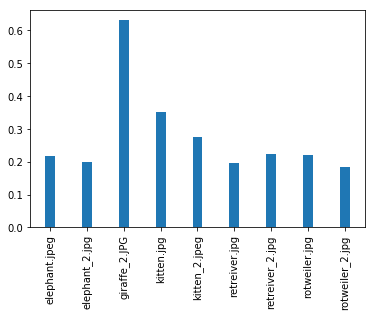

In [77]:
plot_similarity_scores('giraffe.jpeg')

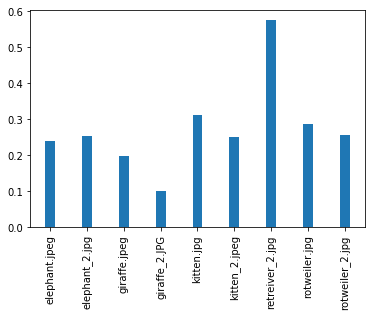

In [78]:
plot_similarity_scores('retreiver.jpg')

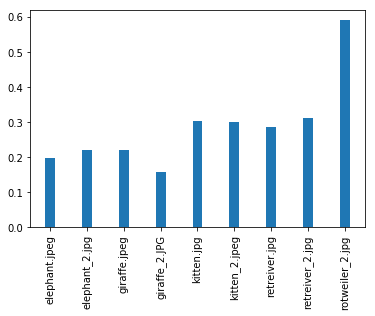

In [79]:
plot_similarity_scores('rotweiler.jpg')

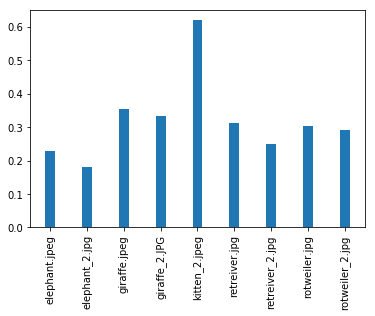

In [80]:
plot_similarity_scores('kitten.jpg')

As we can see from the examples, the feature matching does a pretty good job of matching images that are more similar to itself than others. This can be very useful when solving different data science problems such as object image collection and storage as we can store images that are more similar together.
To finish up our matching lets use these scores to get the best matching picture and plot the two pictures side by side.

In [81]:
def get_best_match(key):
    similarity_scores = cosine_score[key]
    best_score = 0
    best_img = None
    for key,value in similarity_scores.items():
        if (float(value) > float(best_score)):
            best_img = key
            best_score = value
    return best_img,best_score

                


In [82]:
best_match_img_dict = {}
best_match_score_dict = {}
seen_keys = []
for key,value in cosine_score.items():
    if(key not in seen_keys):
        best_img,best_score = get_best_match(key)
        best_match_img_dict[key] = best_img
        best_match_score_dict[key] = best_score
        seen_keys.append(best_img)
print(best_match_img_dict)
print(best_match_score_dict)

{'elephant.jpeg': 'elephant_2.jpg', 'giraffe.jpeg': 'giraffe_2.JPG', 'kitten.jpg': 'kitten_2.jpeg', 'retreiver.jpg': 'retreiver_2.jpg', 'rotweiler.jpg': 'rotweiler_2.jpg'}
{'elephant.jpeg': 
 0.4641
[torch.FloatTensor of size 1]
, 'giraffe.jpeg': 
 0.6309
[torch.FloatTensor of size 1]
, 'kitten.jpg': 
 0.6191
[torch.FloatTensor of size 1]
, 'retreiver.jpg': 
 0.5742
[torch.FloatTensor of size 1]
, 'rotweiler.jpg': 
 0.5897
[torch.FloatTensor of size 1]
}


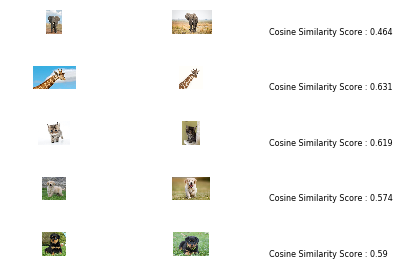

In [83]:
base_dir = 'data/'
def display_similar_images():
    figure, axis = plt.subplots(len(best_match_img_dict),3)
    i = 0
    for key,value in best_match_img_dict.items():
        img1 = Image.open(os.path.join(base_dir,key))
        img2 = Image.open(os.path.join(base_dir,value))
        axis[i,0].imshow(img1)
        axis[i,0].axis('off')
        axis[i,1].imshow(img2)
        axis[i,1].axis('off')
        score = best_match_score_dict[key]
        axis[i,2].text(0,0,r'Cosine Similarity Score : ' + str(np.round(float(score),3)), fontsize=8)
        axis[i,2].axis('off')
        i+=1
    figure.tight_layout()
    plt.show()
        
    
display_similar_images() 

### Summary and Refreneces

#### This tutorial touches upon the basics of how to extract features on images using convolutional neural networks. There are many other neural nets trained on diferent datasets and have different architectures.
##### Also other libries such as tensorflow, caffe etc. can be used to implement the CNN's as some networks may only be available on certain libraries.

#### Some other ways to do feature matching can be through computer vision filter banks and examples of their usage can be seen on the OpenCV library.

###### Information about relevant libraries can be found at - 

Pytorch - http://pytorch.org/

Pillow - https://pillow.readthedocs.io/en/latest/

Tensorflow - https://www.tensorflow.org/

Caffe - http://caffe.berkeleyvision.org/

OpenCV for python- http://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_tutorials.html

